In [1]:
import pandas as pd

In [2]:
import os
import sys
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
print(dir_path)
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import time
import numpy as np
import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
from lynne_pp import *
import pandas as pd
import matplotlib.pyplot as plt


/Users/josh/Documents/Harvard/GLM


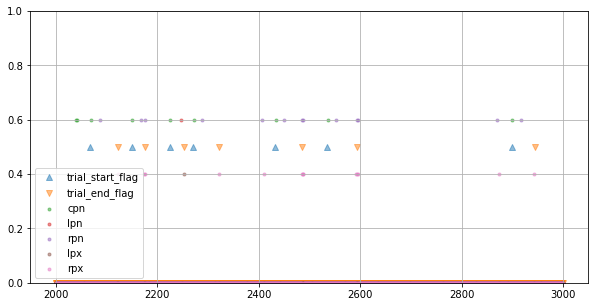

In [3]:
df = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10062021.txt')
df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
df = rename_columns(df)
df = define_trial_starts_ends(df, trial_shift_bounds=1)

lb = 2000
ub = 3000

plt.figure(figsize=(10,5))
care = df.iloc[lb:ub]
for col in ['trial_start_flag', 'trial_end_flag', 'cpn', 'lpn', 'rpn', 'lpx', 'rpx']:
    if col == 'trial_start_flag':
        marker = '^'
        mult = 0.5
    elif col == 'trial_end_flag':
        marker = 'v'
        mult = 0.5
    else:
        marker = '.'
        if col[-1] == 'n':
            mult = 0.6
        else:
            mult = 0.4
    care_filt = care#[care[col] > 0]
    plt.scatter(care_filt.index, care_filt[col]*mult, label=col, alpha=0.5, marker=marker)
plt.ylim(0,1)
plt.grid(True, which='both')
plt.legend()

In [4]:
df_t = pd.read_csv('/Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10062021.txt')
df_t

,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
0,0,0,0,0,0,0,1,0,0.1,0.9,0
1,0,0,0,0,0,0,1,0,0.1,0.9,0
2,0,0,0,0,0,0,1,0,0.1,0.9,0
3,0,0,0,0,0,0,1,0,0.1,0.9,0
4,0,0,0,0,0,0,1,0,0.1,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...
260,1,28386,28387,28404,28444,28408,0,1,0.1,0.9,1
261,1,28544,28545,28561,28588,28564,0,1,0.1,0.9,1
262,1,28714,28715,28729,28758,28736,0,1,0.1,0.9,1
263,1,28810,28811,28828,28864,28832,0,1,0.1,0.9,1


In [5]:
# dftmp = df.copy()
# dftmp.loc[df_t['photometrySideOutIndex'].values].drop(0)

In [6]:
# idx = 1354
# dftmp.loc[idx-10:idx+10]

In [7]:
col_lst = [
    'photometryCenterInIndex',
    'photometryCenterOutIndex',
    'photometrySideInIndex',
    'photometrySideOutIndex',
    'photometryFirstLickIndex'
]

In [8]:
import glob

df2 = pd.DataFrame()

data_folder = '/Users/josh/Documents/Harvard/GLM'

# GLM_SIGNALS_WT61_10062021.txt

# for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt'):
#     table_fn = fn.replace('GLM_SIGNALS', 'GLM_TABLE')
#     print(fn, '--', table_fn)

#     df_t = pd.read_csv(table_fn)

#     df = pd.read_csv(fn)    
#     df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
#     # df = rename_columns(df)
#     # df = define_trial_starts_ends(df, trial_shift_bounds=1)
#     # df = preprocess_lynne(df, trial_shift_bounds=1)

#     for col_val in col_lst:
#         new_name = col_val.replace('Index', '')

#         df[new_name] = 0

#         inx = df_t[col_val].values - 1
#         inx = inx[inx >= 0]
#         df.loc[inx, new_name] = 1

#         df[f'{new_name}_r'] = 0
#         df[f'{new_name}_nr'] = 0
#         df.loc[inx, f'{new_name}_r'] = df_t[df_t[col_val] - 1 >= 0]['wasRewarded'].values
#         df.loc[inx, f'{new_name}_nr'] = df_t[df_t[col_val] - 1 >= 0]['wasRewarded'].values

    
#     df['nTrial'] = df['photometryCenterIn'].cumsum()
#     df['nEndsTrial'] = df['photometrySideOut'].cumsum()

#     print(df2.isna().sum().sum())

#     if len(df2) == 0:
#         df2 = df.copy()
#     else:
#         df2 = df2.append(df)

#     # display(df2)
#     # break

In [9]:
# glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt')

In [39]:
import glob
from collections import defaultdict

# alignment_index_list = defaultdict(list)

# for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_*.txt'):
for fn in glob.glob(f'{data_folder}/GLM_SIGNALS_WT61_10152021.txt'):
    table_fn = fn.replace('GLM_SIGNALS', 'GLM_TABLE')
    print(fn, '--', table_fn)

    df_t = pd.read_csv(table_fn)
    

    df = pd.read_csv(fn)    
    df = df[[_ for _ in df.columns if 'Unnamed' not in _]]
    # df = rename_columns(df)
    # df = define_trial_starts_ends(df, trial_shift_bounds=1)
    # df = preprocess_lynne(df, trial_shift_bounds=1)

    all_inx = (df_t[col_lst].values.reshape(-1) - 1).astype(int)
    assoc_rew = np.tile(df_t['wasRewarded'].values, (len(col_lst))).astype(int)

    assoc_rew = assoc_rew[all_inx >= 0]
    all_inx = all_inx[all_inx >= 0]

    df.loc[all_inx, 'wasRewarded'] = assoc_rew
    # df['wasRewarded'] = df['wasRewarded']#.fillna(0)


    
    for col_val in col_lst:
        new_name = col_val.replace('Index', '')

        df[new_name] = 0

        inx = df_t[col_val].values - 1
        inx = inx[inx >= 0]
        df.loc[inx, new_name] = 1

        # df[f'{new_name}_r'] = df[new_name]*df['wasRewarded']
        # df[f'{new_name}_nr'] = df[new_name]*(1-df['wasRewarded'])

        # alignment_index_list[new_name].append(len(df2) + inx)

        # print(col_val)
        # display(df.loc[inx])    

    df['nTrial'] = df['photometryCenterIn'].cumsum()
    df['nEndTrial'] = df['photometrySideOut'].cumsum()

    # with pd.option_context('max_columns', 1000, 'max_rows', 100):
    #     display(df[~df['wasRewarded'].isna()])
    #     # display(df.iloc[1183:1210])

    # break

    # print(df2.isna().sum().sum())

    if len(df2) == 0:
        df2 = df.reset_index().copy()
    else:
        df2 = df2.append(df.reset_index().copy())

use_list = df[~df['wasRewarded'].isna()]

/Users/josh/Documents/Harvard/GLM/GLM_SIGNALS_WT61_10152021.txt -- /Users/josh/Documents/Harvard/GLM/GLM_TABLE_WT61_10152021.txt


In [11]:
# df2['combor'] = ((df2['reward'] + df2['wasRewarded']) > 0)*1

In [12]:
for col_val in col_lst:
    new_name = col_val.replace('Index', '')
    # df2[f'{new_name}_r'] = df2[new_name]*df2['combor']
    # df2[f'{new_name}_nr'] = df2[new_name]*(1-df2['combor'])

    # df2[f'{new_name}_r'] = df2[new_name]*df2['reward']
    # df2[f'{new_name}_nr'] = df2[new_name]*(1-df2['reward'])

    df2[f'{new_name}_r'] = df2[new_name]*df2['wasRewarded']
    df2[f'{new_name}_nr'] = df2[new_name]*(1-df2['wasRewarded'])


In [13]:
# df2

In [14]:
# df2

Int64Index([10532, 10535, 10570, 10571, 10592], dtype='int64')


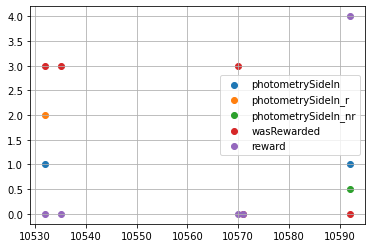

In [49]:
lb = 10530
ub = 10600

lb, ub = df2['wasRewarded'].iloc[lb:ub].dropna().index.min(), df2['wasRewarded'].iloc[lb:ub].dropna().index.max()

# inx = df2.iloc[lb:ub].query("(wasRewarded != reward)&(wasRewarded == wasRewarded)&(reward == reward)")['wasRewarded'].dropna().index
inx = df2.iloc[lb:ub].query("(wasRewarded == wasRewarded)&(reward == reward)")['wasRewarded'].dropna().index
print(inx)

# plt.scatter(data=df2['photometrySideIn'].iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn', label='photometrySideIn')
# plt.scatter(data=(df2['photometrySideIn_r']*2).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_r', label='photometrySideIn_r')
# plt.scatter(data=(df2['photometrySideIn_nr']*0.5).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_nr', label='photometrySideIn_nr')
# plt.scatter(data=(df2['wasRewarded']*3).iloc[lb:ub].reset_index(), x='index', y='wasRewarded', label='wasRewarded')
# plt.scatter(data=(df2['reward']*4).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='reward', label='reward')
# # plt.scatter(data=(df2['combor']*5).iloc[lb:ub].replace(0, np.nan).reset_index(), x='index', y='combor', label='combor')

plt.scatter(data=df2.loc[inx,'photometrySideIn'].replace(0, np.nan).reset_index(), x='index', y='photometrySideIn', label='photometrySideIn')
plt.scatter(data=(df2.loc[inx,'photometrySideIn_r']*2).replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_r', label='photometrySideIn_r')
plt.scatter(data=(df2.loc[inx,'photometrySideIn_nr']*0.5).replace(0, np.nan).reset_index(), x='index', y='photometrySideIn_nr', label='photometrySideIn_nr')
plt.scatter(data=(df2.loc[inx,'wasRewarded']*3).reset_index(), x='index', y='wasRewarded', label='wasRewarded')
plt.scatter(data=(df2.loc[inx,'reward']*4).reset_index(), x='index', y='reward', label='reward')

plt.legend()
plt.grid()

In [42]:
df_t[df_t['photometrySideInIndex'].between(10530, 10600)]

,hasAllPhotometryData,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndex,photometrySideOutIndex,photometryFirstLickIndex,choseLeft,choseRight,leftRewardProb,rightRewardProb,wasRewarded
155,1,10516,10572,10533,10536,0,0,1,0.85,0.15,0
156,1,10571,10572,10593,10624,10596,1,0,0.85,0.15,1


In [48]:
with pd.option_context('max_rows', 1000, 'max_columns', 1000):
    display(df[df.reset_index()['index'].between(10530, 10600)])

,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,SGP_1,SGP_2,SGP_5,SGP_6,centerOcc,centerIn,centerOut,rightOcc,rightIn,rightOut,rightLick,leftOcc,leftIn,leftOut,leftLick,reward,noreward,wasRewarded,photometryCenterIn,photometryCenterOut,photometrySideIn,photometrySideOut,photometryFirstLick,nTrial,nEndTrial
10530,0.577638,2.092008,0.810387,0.342304,0.202569,0.666818,-0.056357,-0.165699,0.202569,0.666818,-0.056357,-0.165699,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,91,90
10531,2.081151,0.593498,1.163298,-0.913881,-0.249807,-1.260880,-0.802093,0.866688,-0.249807,-1.260880,-0.802093,0.866688,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,91,90
10532,2.715299,-0.958491,2.077475,-0.240998,0.008618,-0.180596,0.072047,-2.363312,0.008618,-0.180596,0.072047,-2.363312,0,0,0,1,1,0,0,0,0,0,0,0,1,1.0,0,0,1,0,0,91,90
10533,1.768283,-0.050291,1.274917,-1.115855,0.465773,-0.547793,1.549573,0.970920,0.465773,-0.547793,1.549573,0.970920,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,0,91,90
10534,0.599657,0.233410,0.730695,-0.630397,1.056659,0.793070,2.356037,1.909040,1.056659,0.793070,2.356037,1.909040,0,0,0,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,0,91,90
10535,-0.380067,0.818205,-0.357238,1.050167,1.443007,0.577319,1.355929,1.781868,1.443007,0.577319,1.355929,1.781868,0,0,0,1,0,1,0,0,0,0,0,0,1,1.0,0,0,0,1,0,91,91
10536,-1.138131,0.858352,-1.279146,1.627810,1.177682,2.946444,2.048580,-0.011725,1.177682,2.946444,2.048580,-0.011725,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,91,91
10537,-1.229236,-0.120901,-1.369392,-0.234454,0.554688,0.994267,2.610200,-0.387338,0.554688,0.994267,2.610200,-0.387338,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,91,91
10538,-0.599212,0.065614,-0.400114,0.384548,0.395955,0.711632,2.429250,-1.270167,0.395955,0.711632,2.429250,-1.270167,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,91,91
10539,0.371020,0.385071,0.735276,1.291436,0.459792,0.223036,1.933694,-1.147131,0.459792,0.223036,1.933694,-1.147131,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,91,91


In [17]:
# # df2.columns

# for col in ['photometryCenterInIndex',
#             'photometryCenterOutIndex',
#             'photometrySideInIndex',
#             'photometrySideOutIndex',
#             'photometryFirstLickIndex',
#             'wasRewarded']:
#     df2[col] = 0
#     inx = df_t[col].values - 1
#     inx = inx[inx >= 0]
#     df2.loc[inx, col] = 1

01
02



06
07
01
02



06
07


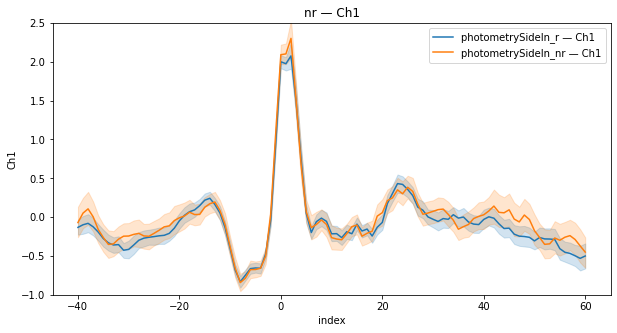

01
02



06
07
01
02



06
07


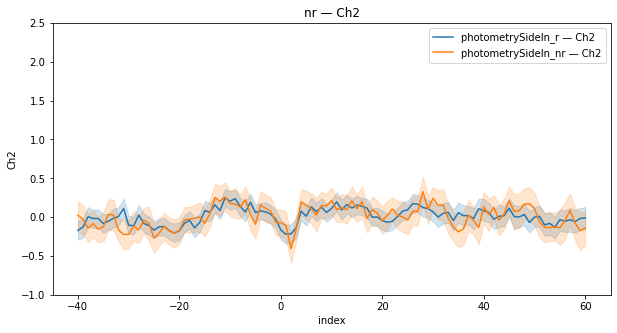

01
02



06
07
01
02



06
07


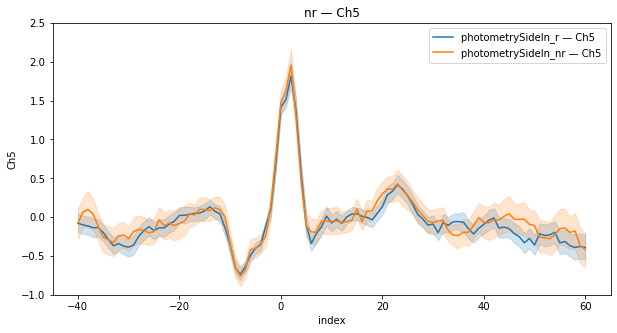

01
02



06
07
01
02



06
07


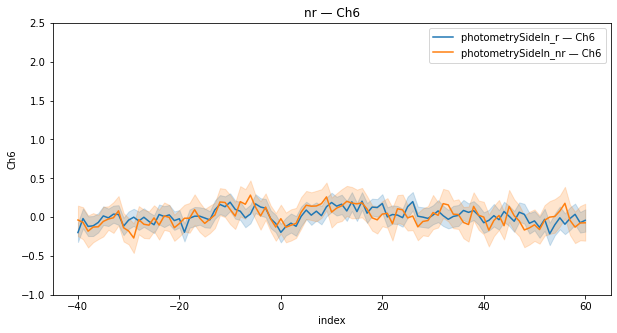

,level_0,index,Ch1,Ch2,Ch5,Ch6,GP_1,GP_2,GP_5,GP_6,...,photometryCenterIn_r,photometryCenterIn_nr,photometryCenterOut_r,photometryCenterOut_nr,photometrySideIn_r,photometrySideIn_nr,photometrySideOut_r,photometrySideOut_nr,photometryFirstLick_r,photometryFirstLick_nr
0,1241,-105,-0.305496,-0.372916,-0.538906,0.502469,-0.272448,0.115847,0.259745,0.576892,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1242,-104,-0.040803,-0.782688,1.075134,1.979788,0.229221,0.361420,0.654071,0.708443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1243,-103,0.812755,0.188967,1.661868,-0.759583,0.012197,-0.618724,0.602691,-1.354157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1244,-102,1.084521,0.835261,1.632686,-1.526374,-0.421164,-0.307188,1.659030,0.669592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1245,-101,0.438955,-1.504360,0.645659,0.013484,-1.148756,-0.314019,3.064368,0.515759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,42252,78,-0.359994,1.961379,-0.028995,2.618855,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,42253,79,-1.198795,1.602565,-0.630819,0.245484,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,42254,80,-1.517797,-0.427352,-1.655700,0.057226,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,42255,81,-1.438277,-1.952560,-0.655539,-0.040746,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import seaborn as sns
from tqdm.notebook import tqdm

for channel in ['Ch1', 'Ch2', 'Ch5', 'Ch6']:
    plt.figure(figsize=(10,5))
    # for alignment_col in ['ft_r_spn', 'ft_nr_spn']:
    for alignment_col in ['photometrySideIn_r', 'photometrySideIn_nr']:
    # for alignment_col in ['photometrySideIn_nr']:
        relative_df = pd.DataFrame()
        rel_points = df2[df2[alignment_col] > 0].reset_index()
        # display(rel_points.iloc[:, -15:])
    #     break
    # break

        print('01')
        identifiers = rel_points[['index', 'nTrial', 'nEndTrial']].dropna().values.astype(int)
        print('02')

        lst_extendeds = []
        
        for idx, nTrial, nEndTrial in tqdm(identifiers):
            extended_trial = df2[(df2['nTrial'] == nTrial) | (df2['nEndTrial'] == nEndTrial)].reset_index().copy()
            # print('03', idx)
            extended_trial['index'] -= idx
            # print('04', idx)

            lst_extendeds.append(extended_trial.copy())


    #         # display(rel_points.iloc[:, -15:])
    #         with pd.option_context('max_columns', 1000, 'max_rows', 2000):
    #             display(extended_trial[extended_trial['index'].between(-3, 3)])
    # #         break
    # #     break
    # # break

            # if len(relative_df) == 0:
            #     relative_df = extended_trial.copy()
            # else:
            #     relative_df = pd.concat([relative_df, extended_trial])
            # # print('05', idx)

        relative_df = pd.concat(lst_extendeds)

        
        alignment_name = alignment_col.split('_')[-1]
        sns.lineplot(x='index', y=channel, data=relative_df[relative_df['index'].between(-40, 60)], label=f'{alignment_col} — {channel}')

        print('06')
        # plot_df = relative_df[relative_df['index'].between(-40, 60)].groupby('index')[channel].mean().reset_index()
        # plt.plot(plot_df['index'], plot_df[channel], label=f'{alignment_col} — {channel}')

        print('07')

        plt.title(f'{alignment_name} — {channel}')
        plt.ylim(-1,2.5)
        plt.grid()
    plt.legend()
    plt.show()

display(relative_df)


In [19]:
print(plot_df)

NameError: name 'plot_df' is not defined